# Rating Hotels Project

## Imports Libraries

In [1]:
from selenium import webdriver
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
from urllib.parse import urljoin
import numpy as np
import requests
from bs4 import BeautifulSoup
import time
import re
from itertools import cycle
from tqdm import tqdm
import random
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
import csv
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

## Performing data extraction - Crawling

Python code to create an array to store links downloaded from a website using Google Drive.
Uses Selenium and ChromeDriver for web scraping.
Initializes the data array.
Repeats several pages of the TripAdvisor website.
Parse the page source using BeautifulSoup.
ChromeDriver is used to control the Chrome browser.

In [2]:
options = Options()
chromedriver_path = r"C:\Program Files\chromedriver_win32\chromedriver.exe"
service = Service(chromedriver_path)
service.start()
driver = webdriver.Chrome(service=service, options=options)
sleep_time = random.uniform(1, 5)

In [ ]:
data = []
link = "https://www.tripadvisor.co.il/Hotels-g293977-Israel-Hotels-"
num_pages = 83

for i in range(1, num_pages):
    url = link + "oa" + str(i * 30)
    driver.get(url)
    time.sleep(sleep_time)  # Adjust sleep time as needed

    show_all_buttons = driver.find_elements(By.CSS_SELECTOR, 'button.rmyCe._G.B-.z._S.c.Wc.wSSLS.pexOo.sOtnj')
    for button in show_all_buttons:
        driver.execute_script("arguments[0].click();", button)
        time.sleep(sleep_time)

    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'html.parser')

    mtag = soup.find_all("div", attrs={"class": "jsTLT K"})
    for t in mtag:
        hotel_links = t.find("a", attrs={'class': 'BMQDV _F G- wSSLS SwZTJ FGwzt ukgoS'})
        if hotel_links:
            relative_url = hotel_links['href']
            absolute_url = urljoin(url, relative_url)
            data.append(absolute_url)

driver.quit()

In [ ]:
with open('C:\output\link_page_table.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['URLs'])
    writer.writerows([[url] for url in data])

Here, we are performing the retrieval of the URL file that was exported in the previous stage.
We iterate over each URL in the file and fetch the hotel Facilities according to our testing requirements.
Afterwards, we insert all the Facilities into an additional table.


In [ ]:
link_page = pd.read_csv(r'C:\data\link_page_table.csv')

In [ ]:
data_dict = {'Name': [],'Rating': [],'Wifi': [],'Jacuzzi': [],'Bar': [],'Pool Inside': [],'Break Fast': [],'Spa': [], 'Gym': [],
             'Air Conditioner': [],'Synagogue': [],'Parking': [],'Beach': [],'Room Service': [],'Refrigerator': [],
             'Sea View': [],'Pet Friendly': [],'Kids Room': [],'Entertainment Staff': [],'Events Hall': [],'Taxi Service': [],
             'Location': [] }



In [ ]:
counter = []
count = 1

for url in tqdm(link_page['URLs']):
    driver = webdriver.Chrome(service=service, options=options)
    driver.maximize_window()
    driver.get(url)
    wait = WebDriverWait(driver, 10)
    wait.until(EC.presence_of_element_located((By.TAG_NAME, 'body')))
    time.sleep(random.randint(1, 4))
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'html.parser')
    counter.append(count)
    count += 1

    #cleaning the hotel name
    try:
        hotel_name = driver.find_element(By.TAG_NAME, 'h1').text.strip()
        hotel_name = re.sub("[\u202a]", "", hotel_name) 
        hotel_name = re.sub("[\u202c]", "", hotel_name)
        data_dict['Name'].append(hotel_name)
    except:
        data_dict['Name'].append('')

    # extract the location text 
    span_element = soup.select_one('span.iVKnd.fSVJN')
    if span_element:
        number_text = span_element.get_text(strip=True)

        # convert the text to an integer
        number = int(number_text)
        if number > 49:
            data_dict['Location'][-1] = 1

    # extract the rating text 
    rate_element = soup.select_one('span.uwJeR.P')
    if (rate_element):
        number_text = rate_element.get_text(strip=True)
        # convert the text to an integer
        number = float(number_text) 
        data_dict['Rating'].append(number)  
    else:
        data_dict['Rating'].append(1)  

            
#     # Initialize all feature lists with 0
#     for feature in data_dict.keys():
#         if feature != 'Name':
#             data_dict[feature].append(0)
            
    # Find all elements with the class name "yplav f ME H3 _c"
    elements = soup.select("div.yplav.f.ME.H3._c")
    # Extract the text from each element
    for element in elements:
        text = element.get_text(strip=True)

        if "ג'קוזי" in text:
            data_dict['Jacuzzi'][-1] = 1

        if "אינטרנט" in text:
            data_dict['Wifi'][-1] = 1

        if "בר / טרקלין" in text:
            data_dict['Bar'][-1] = 1

        if "חניה" in text:
            data_dict['Parking'][-1] = 1

        if "כנסייה / בית תפילה" in text:
            data_dict['Synagogue'][-1] = 1

        if "מרכז כושר עם חדר כושר" in text:
            data_dict['Gym'][-1] = 1

        if "ספא" in text:
            data_dict['Spa'][-1] = 1

        if "בריכה מקורה" in text:
            data_dict['Pool Inside'][-1] = 1

        if "ארוחת בוקר חינם" in text:
            data_dict['Break Fast'][-1] = 1

        if "מיזוג אוויר" in text:
            data_dict['Air Conditioner'][-1] = 1

        if "חוף פרטי" in text:
            data_dict['Beach'][-1] = 1

        if "שירות חדרים" in text:
            data_dict['Room Service'][-1] = 1

        if "מקרר" in text:
            data_dict['Refrigerator'][-1] = 1

        if "נוף לים" in text:
            data_dict['Sea View'][-1] = 1

        if "ידידותי לחיות מחמד" in text:
            data_dict['Pet Friendly'][-1] = 1

        if "מועדון הילדים" in text:
            data_dict['Kids Room'][-1] = 1

        if "צוות הווי ובידור" in text:
            data_dict['Entertainment Staff'][-1] = 1

        if "חדר לאירועים" in text:
            data_dict['Events Hall'][-1] = 1

        if "שירות מוניות" in text:
            data_dict['Taxi Service'][-1] = 1

        #Saving a backup file
        if (count % 50) == 0:
            data = pd.DataFrame(data_dict)
            data.to_csv(r'C:\data\backup.csv', index=False)

    driver.quit()

data = pd.DataFrame(data_dict)
data.to_csv(r'C:\output\fixtable.csv', index=False)


We make a re-pull of the final file containing the Name, Opinion Rating and all the Facilities. 
Than we checked duplicates from the file to obtain accurate information.


In [3]:
fixtable = pd.read_csv(r'C:\Data\fixtable.csv')

In [4]:
#print and delete duplicates
print('duplicates:',fixtable.duplicated().sum())
fixtable = fixtable.drop_duplicates()

duplicates: 0


## Our table include all of the details we have chosen

In [5]:
fixtable

,Name,Wifi,Jacuzzi,Bar,Pool Inside,Break Fast,Spa,Gym,Air Conditioner,Synagogue,...,Room Service,Refrigerator,Sea View,Pet Friendly,Kids Room,Entertainment Staff,Events Hall,Taxi Service,Location,Rating
0,זרקא סוויטס,1,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,4.5
1,זוהר בגלבוע,1,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,5.0
2,זוהר בדשא,1,0,1,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,4.5
3,זמן ערבה,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.0
4,ח'אן עין כרם,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,Zivon - Switzerland in Amirim,1,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,5.0
2508,Zman Midbar Eco Spirit Lodge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.5
2509,Zohar Badeshe - Ein Habesor,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.0
2510,Zug Yonim,1,1,0,0,0,0,0,1,0,...,1,1,0,1,0,0,0,0,0,5.0


# Calculator average of the hotels

In [6]:
average_values = fixtable.mean()
numeric_columns = fixtable.select_dtypes(include='number')
average_values = numeric_columns.mean()



C:\Users\Ravit\AppData\Local\Temp\ipykernel_31876\1619629750.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  average_values = fixtable.mean()


In [7]:
fixtable['Average'] = fixtable.mean(axis=1)
fixtable['Average'] = fixtable['Average'] * 5

C:\Users\Ravit\AppData\Local\Temp\ipykernel_31876\4193888170.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  fixtable['Average'] = fixtable.mean(axis=1)


In [8]:
fixtable

,Name,Wifi,Jacuzzi,Bar,Pool Inside,Break Fast,Spa,Gym,Air Conditioner,Synagogue,...,Refrigerator,Sea View,Pet Friendly,Kids Room,Entertainment Staff,Events Hall,Taxi Service,Location,Rating,Average
0,זרקא סוויטס,1,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,4.5,2.738095
1,זוהר בגלבוע,1,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,5.0,2.380952
2,זוהר בדשא,1,0,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,4.5,2.500000
3,זמן ערבה,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.0,0.952381
4,ח'אן עין כרם,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,1,5.0,2.619048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,Zivon - Switzerland in Amirim,1,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,5.0,2.380952
2508,Zman Midbar Eco Spirit Lodge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.5,0.833333
2509,Zohar Badeshe - Ein Habesor,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5.0,1.190476
2510,Zug Yonim,1,1,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,5.0,2.857143


## Data Visualization

We will navigate between different graphical and visualization options.

*A graph displays the distribution of facilities and their quantities in hotels:

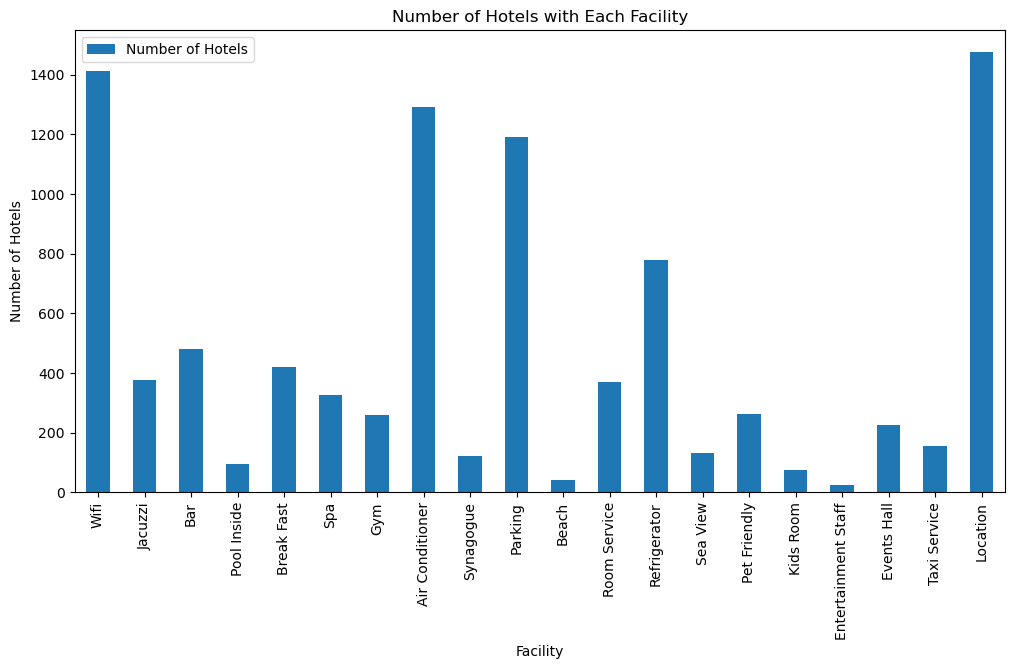

In [9]:
facility_counts = fixtable.drop(['Name', 'Rating', 'Average'], axis=1).sum()
average = facility_counts.mean()
data = pd.DataFrame({'Number of Hotels': facility_counts})

fig, ax = plt.subplots(figsize=(12, 6))
data.plot(kind='bar', ax=ax)
ax.set_title('Number of Hotels with Each Facility')
ax.set_xlabel('Facility')
ax.set_ylabel('Number of Hotels')
plt.show()


*The code calculates the average facilities rating for each hotel, categorizes them into rating categories, and visualizes the distribution using a pie chart and a polar plot:

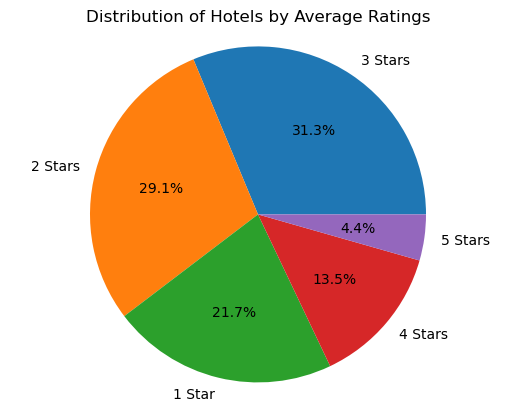

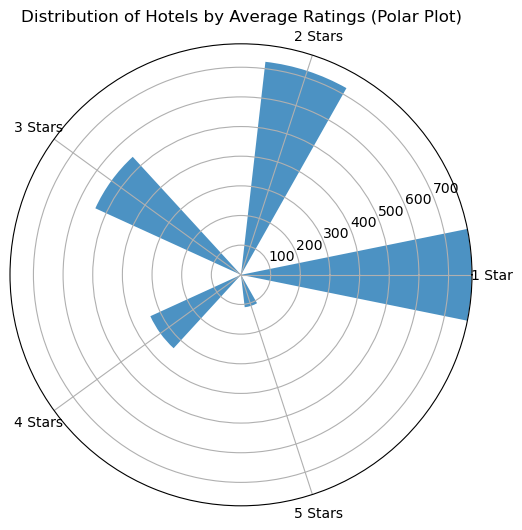

In [10]:
fixtable['Average'] = fixtable.iloc[:, 1:].mean(axis=1)

# Define the bins and labels 
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
labels = ['1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars']
fixtable['Rating Category'] = pd.cut(fixtable['Average'], bins=bins, labels=labels, right=False)
# Count the number of hotels in each rating category
rating_counts = fixtable['Rating Category'].value_counts()
plt.pie(rating_counts.values, labels=rating_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Hotels by Average Ratings')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, polar=True)
angles = [i / float(len(rating_counts)) * 2 * 3.14159 for i in range(len(rating_counts))] #Calc the angles for each rating_counts
ax.bar(angles, rating_counts, width=0.4, alpha=0.8)
plt.xticks(angles, labels, fontsize=10)
plt.yticks(fontsize=10)
ax.set_ylim(0, max(rating_counts) + 1)
plt.title('Distribution of Hotels by Average Ratings (Polar Plot)', fontsize=12)
ax.grid(True)
plt.show()


*The code creates a pie chart with a custom color palette, and displays the distribution of facilities in percentage format:

C:\Users\Ravit\AppData\Local\Temp\ipykernel_31876\1109821626.py:6: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_subset.sum().plot(kind='pie', autopct='%1.1f%%', colors=custom_colors, radius=1.5)


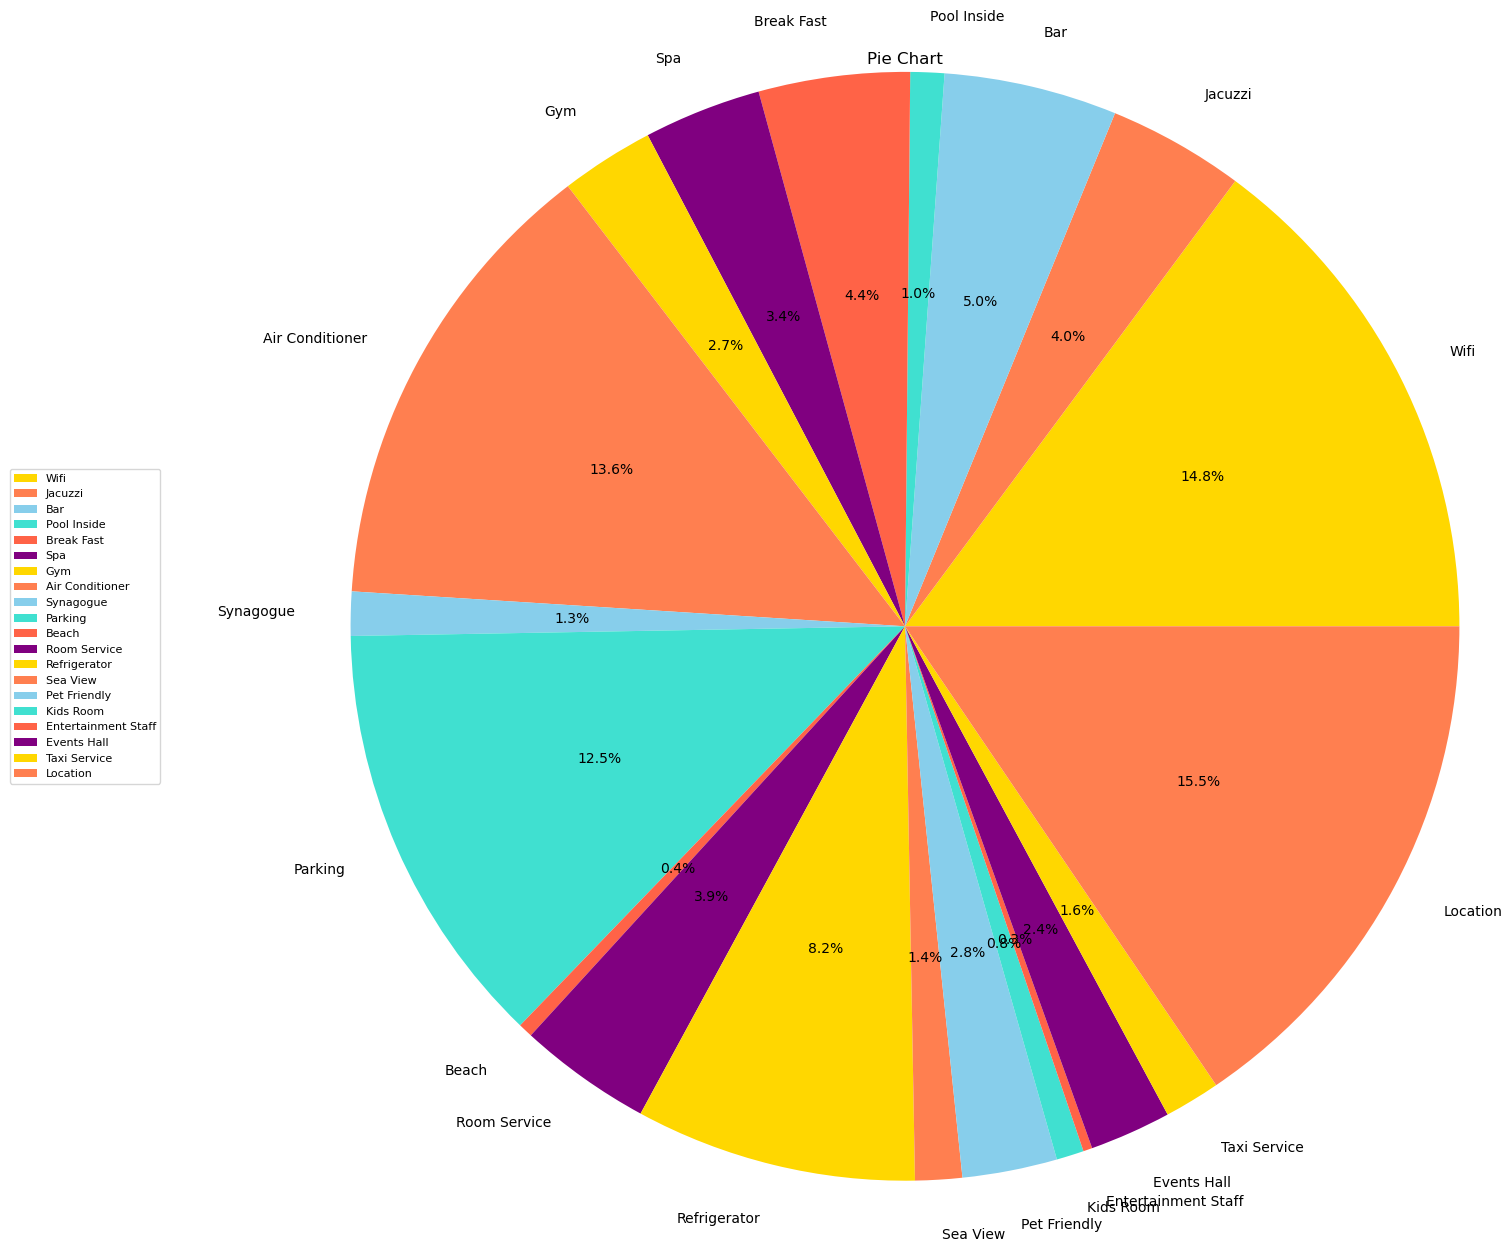

In [11]:
plt.figure(figsize=(12, 12))
custom_colors = ["#FFD700", "#FF7F50", "#87CEEB", "#40E0D0", "#FF6347", "#800080"]
exclude_cols = ["Name", "Rating",'Average']
data_subset = fixtable.drop(exclude_cols, axis=1)
labels = data_subset.columns
data_subset.sum().plot(kind='pie', autopct='%1.1f%%', colors=custom_colors, radius=1.5)
plt.title('Pie Chart', y=1.1)
plt.ylabel('')  # Remove the ylabel
# Reduce the size of the property headers and move the legend further to the left
plt.legend(labels, loc='center right', bbox_to_anchor=(-0.3, 0.5), fontsize=8)
plt.show()


*Here are the top 5 hotels according to the facilities we have chosen:

C:\Users\Ravit\AppData\Local\Temp\ipykernel_31876\1401122882.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixtable_top_5.drop('Average', axis=1, inplace=True) # Drop the Average


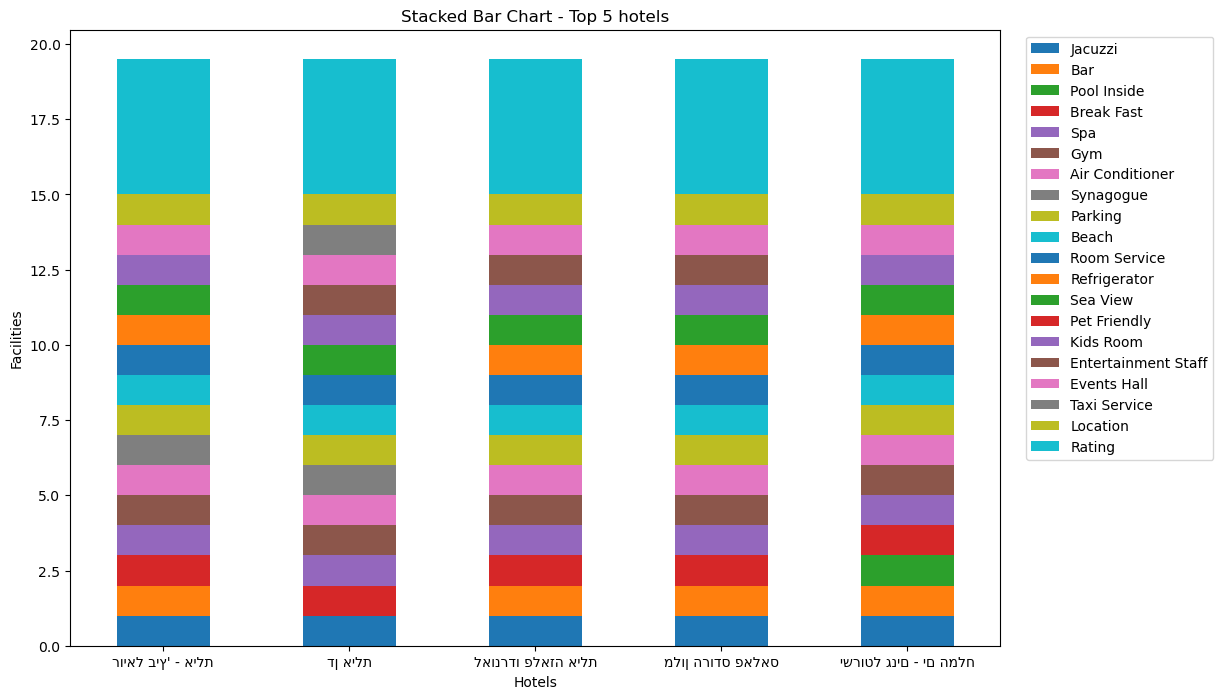

In [12]:
top_5_hotels = fixtable.sort_values('Average', ascending=False).head(5)['Name']
fixtable_top_5 = fixtable[fixtable['Name'].isin(top_5_hotels)]
fixtable_top_5.set_index('Name', inplace=True)
fixtable_top_5.drop('Average', axis=1, inplace=True) # Drop the Average
ax = fixtable_top_5.iloc[:, 1:].plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Hotels')
plt.ylabel('Facilities')
plt.title('Stacked Bar Chart - Top 5 hotels')
plt.xticks(rotation=0, ha='center')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1)) #legend to the right
plt.show()


*Distribution of facilities according to location (if the location is good or not):

C:\Users\Ravit\AppData\Local\Temp\ipykernel_31876\3897134809.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  facility_counts_by_location = fixtable.groupby('Location').sum()
C:\Users\Ravit\AppData\Local\Temp\ipykernel_31876\3897134809.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  facility_colors = plt.cm.get_cmap('tab20')(np.linspace(0, 1, len(facility_counts_by_location.columns)))


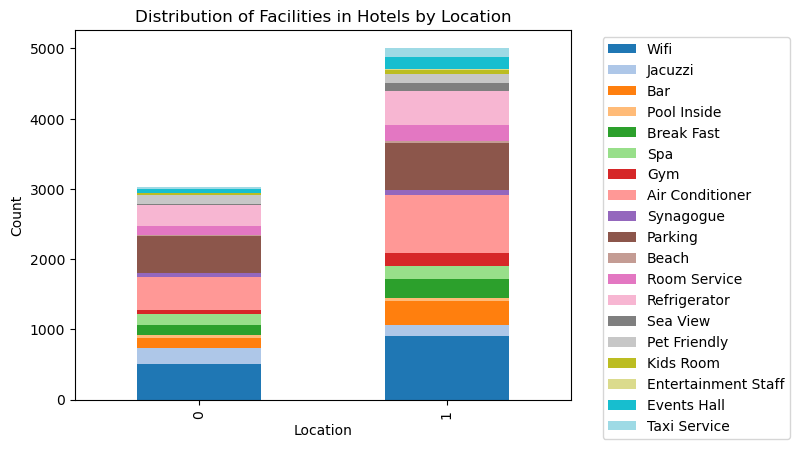

In [13]:
fixtable.drop(['Average', 'Rating'], axis=1, inplace=True)
facility_counts_by_location = fixtable.groupby('Location').sum()
facility_colors = plt.cm.get_cmap('tab20')(np.linspace(0, 1, len(facility_counts_by_location.columns)))
ax = facility_counts_by_location.plot(kind='bar', stacked=True, color=facility_colors)
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Distribution of Facilities in Hotels by Location')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


The Heatmap provides insights into the relationships between different facilities. Positive correlations (dark blue) indicate that when one facility is present, there is a tendency for the facility to also be present. Negative correlations (light yellow) indicate an inverse relationship, indicating that when one facility is present, the other facility is likely to be present:

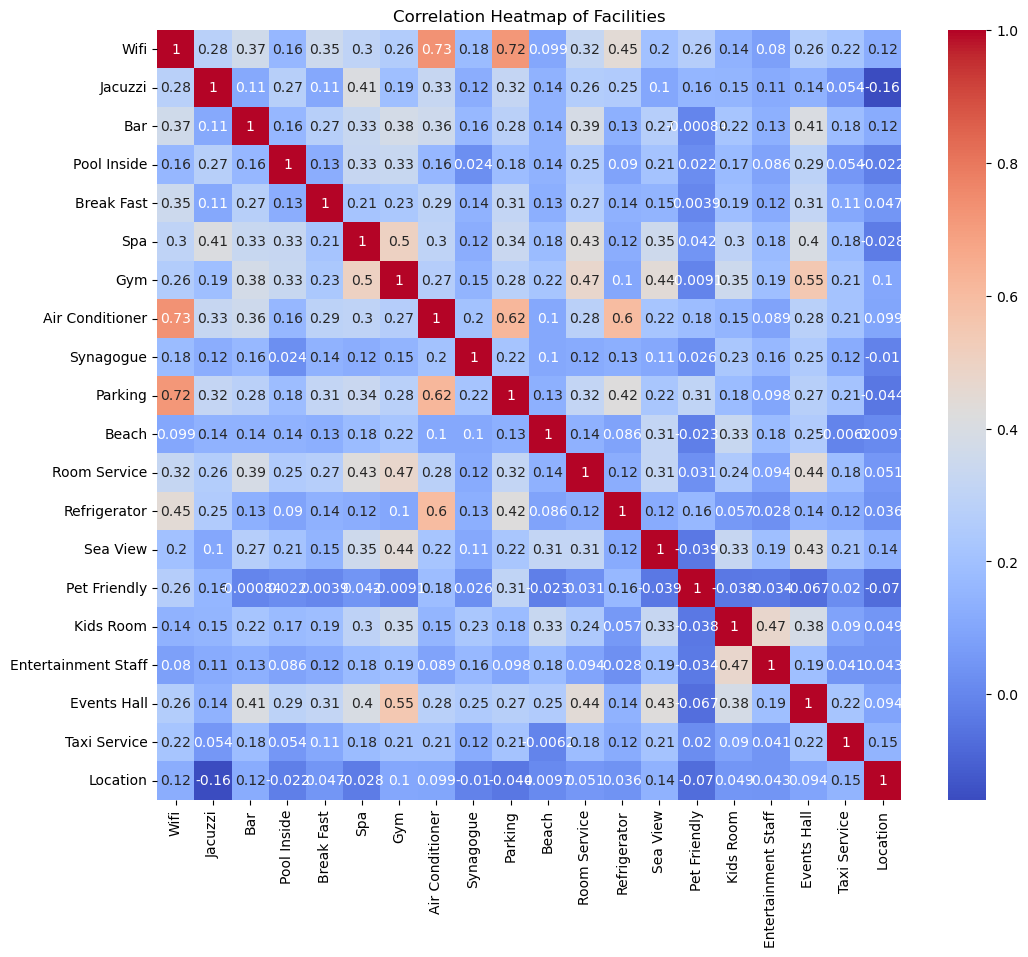

In [14]:
facility_correlation = fixtable.iloc[:, 1:-1].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(facility_correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Facilities')
plt.show()

# Machine Learning 

The code loads data by relevant facillities, prepares it for machine learning.
Data is split for machine learning. It assigns the attributes (X) and the target variable (y) from the DataFrame.
We emphasize that 'Rating' is a variable that presents the opinions of people who have visited the hotels.
The algorithm learns how different features impact the target variable and uses this knowledge to make predictions on new, unseen data.

In [15]:
df = pd.read_csv(r'C:\data\fixtable.csv') # re-pull the DF
# relevant features
features = ['Wifi', 'Jacuzzi', 'Bar', 'Pool Inside', 'Break Fast', 'Spa', 'Gym', 'Air Conditioner',
            'Synagogue', 'Parking', 'Beach', 'Room Service',
            'Kids Room', 'Entertainment Staff', 'Events Hall', 'Taxi Service', 'Location']
target = 'Rating'

X = df[features]
y = df[target]


#### We convert 'Ratings' to binary labels and split the data into traning and testing:
The line y_binary = y.apply(lambda x: 1 if x >= 4 else 0) converts the original ratings (y) into a binary target variable (y_binary). It assigns a value of 1 to ratings that are greater than or equal to 4, indicating a high rating, and assigns a value of 0 to ratings that are less than 4, indicating a low rating.

In [16]:
y_binary = y.apply(lambda x: 1 if x >= 3.5 else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

We used two types of machine learning:
1. Decision tree classifier 
2. RandomForestClassifier.
You can see the accuracy assessment in each of them.

In [17]:
model = DecisionTreeClassifier(max_depth=100, min_samples_split=200, min_samples_leaf=100)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.705765407554672


In [18]:
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.7117296222664016


We saw that RandomForestClassifier gave a slightly better prediction.

## In conclusion,
We performed automation by Selenium in order to access each URL representing a hotel, then we went through each of the URLs and retrieved which facilities are available and which are not, accordingly we represented this in the table using 0 or 1. 
We also entered information about the name of the hotel and a rating by users which helped us get More information about the hotel.
We looked at which hotels were rated better according to the facilities that were important to us and the rate of pepole.

We represented in graphs by using matplotlib library, graphs that interested us such as Top 5 hotels, how the location affects the facilities in the hotel and more.

We have seen by machine learning that it is possible to predict an impressive percentage of the hotel rating.

In the end, we liked the challenge of retrieving the information that would help us to shorten our time and answer questions that interest us later in an easier way.
